<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>

# WITH SEABORN

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if didn't work you can use this parameters: encoding="windows-1252"

In [4]:
police = pd.read_csv('/Users/mahmooooodie/Desktop/DV PROJECTS/ASSIGNMENT 2/PoliceKillingsUS.csv', encoding = 'windows-1252')

In [5]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [6]:
police.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [7]:
police.head(4)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False


## Shape

In [8]:
police.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [9]:
police.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

#### INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [10]:
police.dropna(inplace=True)

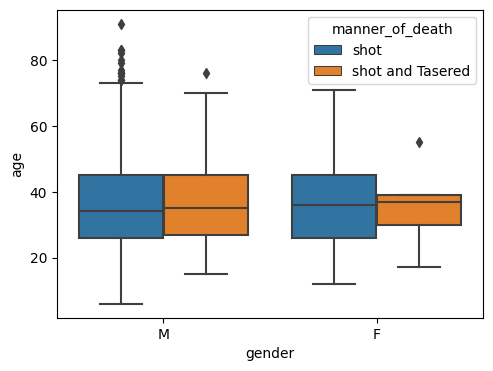

In [11]:
plt.figure(figsize= (5.5,4))
sns.boxplot(data = police, x = 'gender', y = 'age', hue = 'manner_of_death');
# with seaborn

## 1b: Swarm Plot 

#### INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

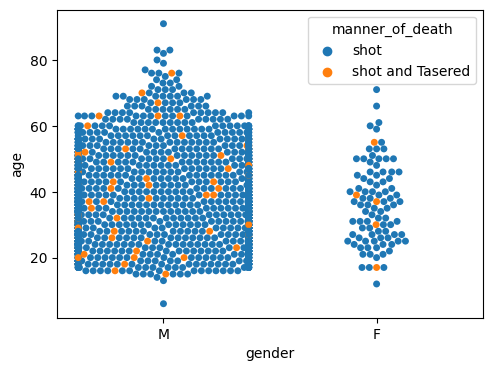

In [12]:
plt.figure(figsize= (5.5,4))
sns.swarmplot(data = police, x = 'gender', y = 'age', hue = 'manner_of_death');

## 2: Plot 12 most dangerous cities

In [13]:
# since the dataset is formed with respect to amount of incident in the cities,
# the more the city is named in the list, the more dangerous it is. 

cities = police['city'].value_counts()
top_12 = cities.head(12)
print("Top 12 Most Dangerous Cities:")
print(top_12)

Top 12 Most Dangerous Cities:
city
Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: count, dtype: int64


In [14]:
np.array(top_12)

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13])

In [15]:
top_12.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object', name='city')

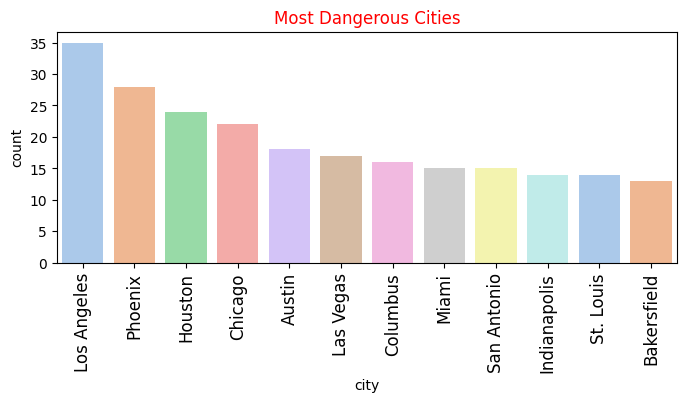

In [25]:
plt.figure(figsize=(8, 3))
ax = sns.countplot(x='city', data=police, order=top_12.index, palette='pastel')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_title('Most Dangerous Cities', color = 'r');

## 3: Plot 20 most dangerous states

In [11]:
states = police['state'].value_counts()
states.head(20)

state
CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: count, dtype: int64

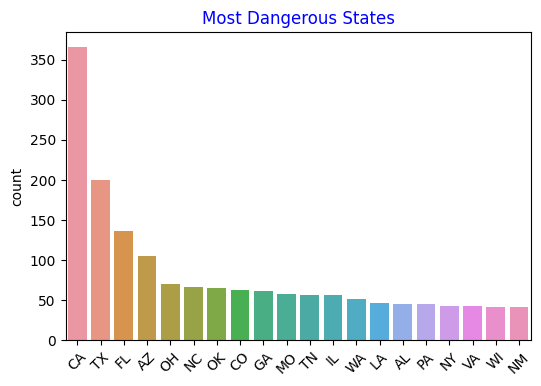

In [16]:
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(data = police, x = states.head(20).index, y = states.head(20))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title('Most Dangerous States', color = 'b');

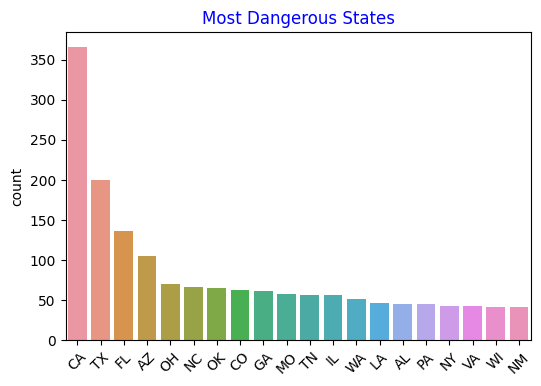

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.countplot(data = police, x = 'state', order = states.head(20).index)
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title('Most Dangerous States', color = 'b');

## 4: Plot Having mental ilness or not for killed people

In [29]:
mental = police['signs_of_mental_illness'].value_counts()
mental

signs_of_mental_illness
False    1681
True      573
Name: count, dtype: int64

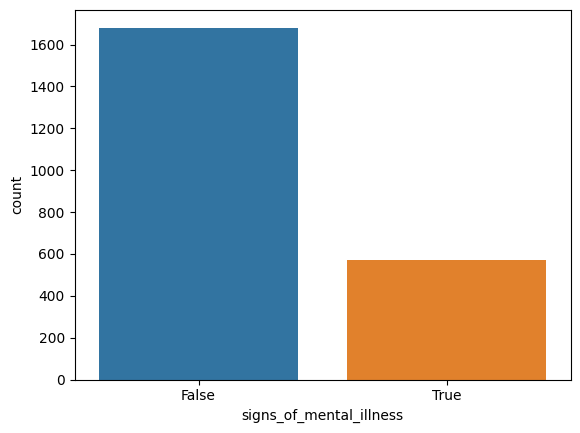

In [39]:
sns.barplot(x=mental.index, y=mental.values)
plt.ylabel('count');

## 5: Plot number of Threat Types

In [42]:
threat = police['threat_level'].value_counts()
threat

threat_level
attack          1462
other            677
undetermined     115
Name: count, dtype: int64

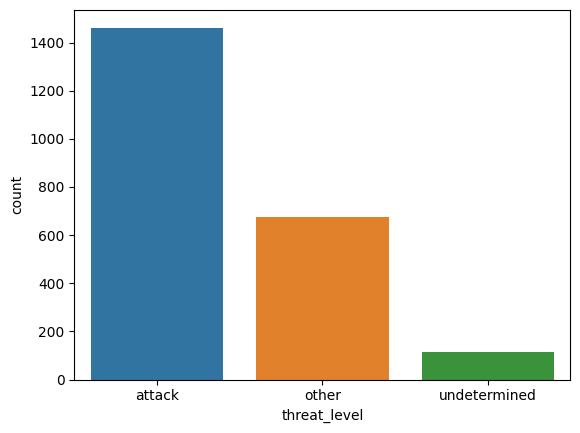

In [43]:
sns.barplot(x = threat.index, y = threat.values)
plt.ylabel('count');

## 6: Plot number of Flee Types

In [44]:
flee_type = police['flee'].value_counts()
flee_type

flee
Not fleeing    1528
Car             360
Foot            278
Other            88
Name: count, dtype: int64

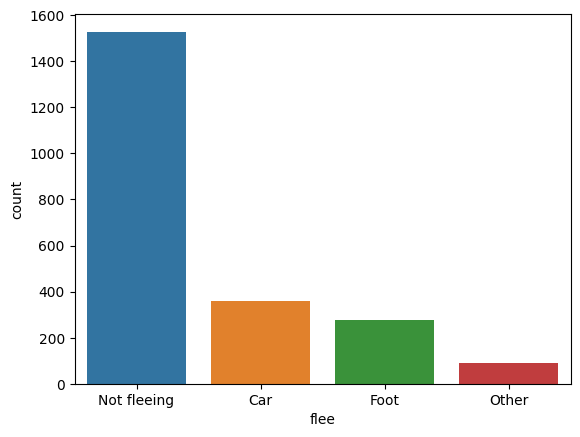

In [46]:
sns.barplot(x = flee_type.index, y = flee_type.values)
plt.ylabel('count');

# Congratulations

## Thank you

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>